In [ ]:
\import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
df = pd.read_csv('/content/crop_yield.csv')
print(df.head())


  Region Soil_Type     Crop  Rainfall_mm  Temperature_Celsius Fertilizer_Used  \
0   West     Sandy   Cotton   897.077239            27.676966           False   
1  South      Clay     Rice   992.673282            18.026142            True   
2  North      Loam   Barley   147.998025            29.794042           False   
3  North     Sandy  Soybean   986.866331            16.644190           False   
4  South      Silt    Wheat   730.379174            31.620687            True   

  Irrigation_Used Weather_Condition  Days_to_Harvest  Yield_tons_per_hectare  
0            True            Cloudy            122.0                6.555816  
1            True             Rainy            140.0                8.527341  
2           False             Sunny            106.0                1.127443  
3            True             Rainy            146.0                6.517573  
4            True            Cloudy            110.0                7.248251  


In [ ]:
df = df.dropna()



In [ ]:
label_encoders = {}

for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


In [ ]:
X = df.drop('Yield_tons_per_hectare', axis=1)
y = df['Yield_tons_per_hectare']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

# Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Root Mean Squared Error (RMSE): 0.524400333715013
R² Score: 0.9038127538443331


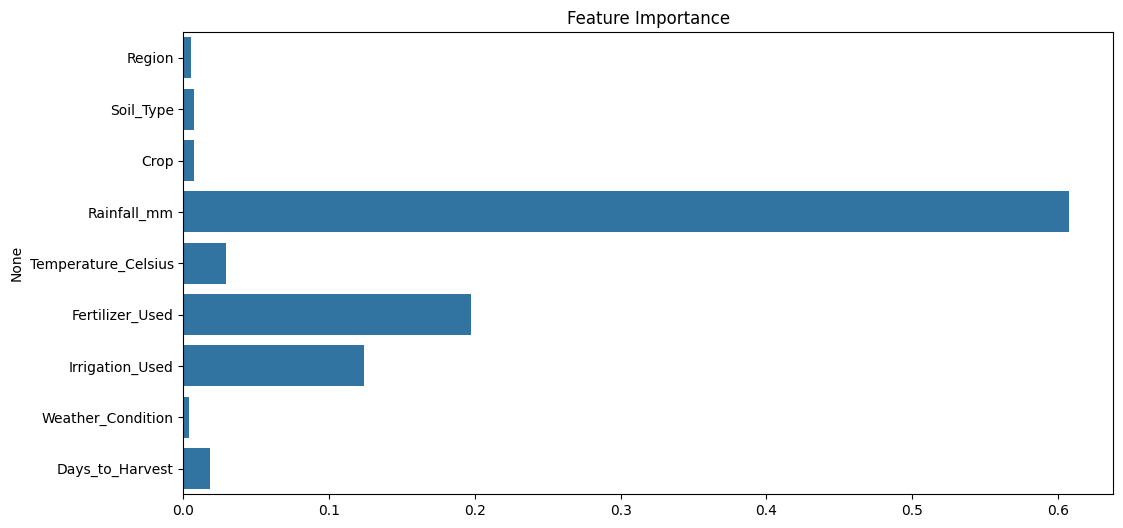

In [ ]:
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(12,6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance')
plt.show()


In [ ]:
import pandas as pd
import joblib


features = ['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius', 'Fertilizer_Used','Irrigation_Used', 'Weather_Condition', 'Days_to_Harvest']


input_data = {}
print("\n🔵 Please provide the following input values:")

for feature in features:
    value = input(f"Enter {feature}: ")

    if feature in ['Rainfall_mm', 'Temperature_Celsius']:
        value = float(value)

    if feature in ['Days_to_Harvest']:
        value = int(value)

    if feature in ['Fertilizer_Used', 'Irrigation_Used']:
        value = value.lower() == 'true'

    if feature in ['Region', 'Soil_Type', 'Crop', 'Weather_Condition']:
        value = str(value).capitalize()

    input_data[feature] = value


input_df = pd.DataFrame([input_data])
for column in ['Region', 'Soil_Type', 'Crop', 'Weather_Condition']:
    input_df[column] = label_encoders[column].transform(itnput_df[column])


prediction = model.predict(input_df)[0]

print(f"\n✅ Predicted Crop Yield: {prediction:.2f} tons per hectare")



🔵 Please provide the following input values:
Enter Region: West
Enter Soil_Type: Sandy
Enter Crop: Cotton
Enter Rainfall_mm: 897.6
Enter Temperature_Celsius: 27.2
Enter Fertilizer_Used: false
Enter Irrigation_Used: true
Enter Weather_Condition: Cloudy
Enter Days_to_Harvest: 120

✅ Predicted Crop Yield: 6.28 tons per hectare


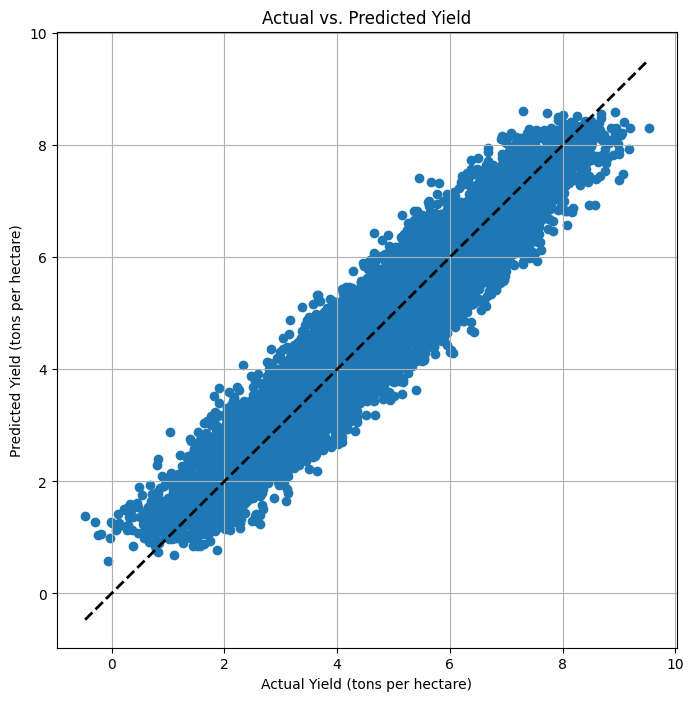

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Diagonal line
plt.xlabel('Actual Yield (tons per hectare)')
plt.ylabel('Predicted Yield (tons per hectare)')
plt.title('Actual vs. Predicted Yield')
plt.grid(True)
plt.show()

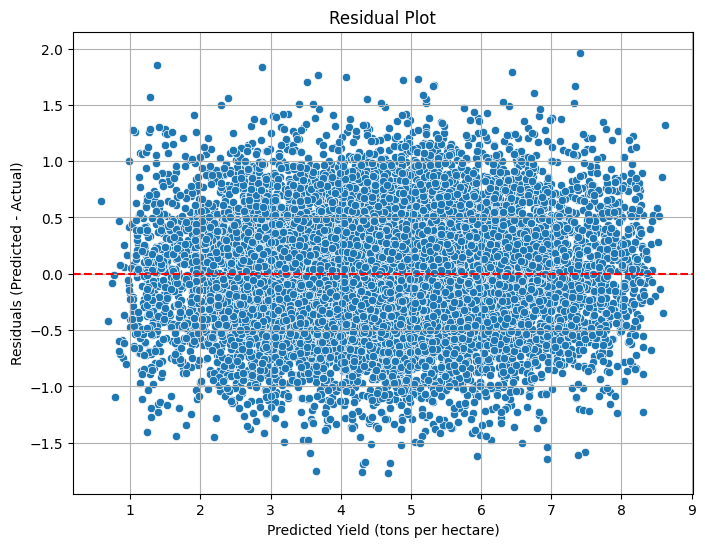

In [ ]:
residuals = y_pred - y_test
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Yield (tons per hectare)')
plt.ylabel('Residuals (Predicted - Actual)')
plt.title('Residual Plot')
plt.grid(True)
plt.show()